In [1]:
from inaturalist import FISH_CLASSES, iNaturalistDataset

In [2]:
train = iNaturalistDataset(
    root="./data",
    train=True,
    download=False,
    classes=['Elasmobranchii'],
    transform=None,
)
test = iNaturalistDataset(
    root="./data",
    train=False,
    download=False,
    classes=['Elasmobranchii'],
    transform=None,
)

recompiling annotations to data/train.csv
recompiling annotations to data/val.csv


In [3]:
train.classes

array(['Whitetip Reef Shark', 'Spotted Eagle Ray', 'Nurse Shark',
       'Southern Stingray', 'Bluespotted Ribbontail Ray',
       "Haller's Round Ray", 'Bat Ray', 'Smooth Stingray',
       'Leopard Shark', 'New Zealand Eagle Ray', 'Grey Nurse Shark',
       'Spotted Wobbegong', 'Port Jackson Shark', 'Banded Wobbegong',
       'Banjo Shark', 'Common Stingaree'], dtype=object)

In [4]:
import pandas as pd

df = train.annotations

df_small_train = None

for species in train.classes:
    rows = df[(df['common_name'] == species)].head(n=3)
    df_small_train = pd.concat([df_small_train, rows]) if df_small_train is not None else rows
    
df_small_train.to_csv("data/train.csv")

df = test.annotations

df_small_test = None

for species in train.classes:
    rows = df[(df['common_name'] == species)].head(n=1)
    df_small_test = pd.concat([df_small_test, rows]) if df_small_test is not None else rows
    
df_small_test.to_csv("data/val.csv")
    
df_small_train

,image_id,category_id,width,height,file_name,index,name,common_name,supercategory,kingdom,phylum,class,order,family,genus,specific_epithet,image_dir_name
0,150,4597,500,375,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
1,376,4597,500,229,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
2,2524,4597,500,375,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
3,2753,4601,500,292,train/04601_Animalia_Chordata_Elasmobranchii_M...,4601,Aetobatus narinari,Spotted Eagle Ray,Animalia,Animalia,Chordata,Elasmobranchii,4,Aetobatidae,Aetobatus,narinari,04601_Animalia_Chordata_Elasmobranchii_Mylioba...
9,3082,4601,500,375,train/04601_Animalia_Chordata_Elasmobranchii_M...,4601,Aetobatus narinari,Spotted Eagle Ray,Animalia,Animalia,Chordata,Elasmobranchii,4,Aetobatidae,Aetobatus,narinari,04601_Animalia_Chordata_Elasmobranchii_Mylioba...
10,3083,4601,500,375,train/04601_Animalia_Chordata_Elasmobranchii_M...,4601,Aetobatus narinari,Spotted Eagle Ray,Animalia,Animalia,Chordata,Elasmobranchii,4,Aetobatidae,Aetobatus,narinari,04601_Animalia_Chordata_Elasmobranchii_Mylioba...
4,2831,4609,500,316,train/04609_Animalia_Chordata_Elasmobranchii_O...,4609,Ginglymostoma cirratum,Nurse Shark,Animalia,Animalia,Chordata,Elasmobranchii,12,Ginglymostomatidae,Ginglymostoma,cirratum,04609_Animalia_Chordata_Elasmobranchii_Orectol...
7,2915,4609,500,222,train/04609_Animalia_Chordata_Elasmobranchii_O...,4609,Ginglymostoma cirratum,Nurse Shark,Animalia,Animalia,Chordata,Elasmobranchii,12,Ginglymostomatidae,Ginglymostoma,cirratum,04609_Animalia_Chordata_Elasmobranchii_Orectol...
14,5496,4609,500,375,train/04609_Animalia_Chordata_Elasmobranchii_O...,4609,Ginglymostoma cirratum,Nurse Shark,Animalia,Animalia,Chordata,Elasmobranchii,12,Ginglymostomatidae,Ginglymostoma,cirratum,04609_Animalia_Chordata_Elasmobranchii_Orectol...
5,2833,4603,500,459,train/04603_Animalia_Chordata_Elasmobranchii_M...,4603,Hypanus americanus,Southern Stingray,Animalia,Animalia,Chordata,Elasmobranchii,6,Dasyatidae,Hypanus,americanus,04603_Animalia_Chordata_Elasmobranchii_Mylioba...


In [5]:
import os

def delete_unlisted_files_recursively(folder_path, allowed_files):
    """
    Recursively deletes files in a folder and its subfolders that are not present in the allowed_files list.

    Args:
        folder_path (str): The path to the folder.
        allowed_files (list): A list of filenames to keep in the folder and subfolders.
    """
    try:
        # Walk through the directory tree
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = "/".join(os.path.join(root, file).split("/")[-3:])

                # Delete the file if it's not in the allowed_files list
                if file_path not in allowed_files:
                    print(f"Deleting: {file_path}")
                    os.remove(os.path.join(root, file))
                else:
                    print("keeping", file_path)
        
        print("Cleanup complete.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [6]:
train.annotations['file_name'][0]

'train/04597_Animalia_Chordata_Elasmobranchii_Carcharhiniformes_Carcharhinidae_Triaenodon_obesus/f56a2421-0746-4a07-96a6-233daba33051.jpg'

In [7]:
delete_unlisted_files_recursively('data/train', df_small_train['file_name'].tolist())
delete_unlisted_files_recursively('data/val', df_small_test['file_name'].tolist())

keeping train/04602_Animalia_Chordata_Elasmobranchii_Myliobatiformes_Dasyatidae_Bathytoshia_brevicaudata/1959c0c9-436e-4068-80b0-a4ac06e89f85.jpg
keeping train/04602_Animalia_Chordata_Elasmobranchii_Myliobatiformes_Dasyatidae_Bathytoshia_brevicaudata/59bc6175-0809-46ea-bb60-aa83cdfb3c36.jpg
keeping train/04602_Animalia_Chordata_Elasmobranchii_Myliobatiformes_Dasyatidae_Bathytoshia_brevicaudata/803606d5-e093-4677-9b6e-38ad7b90b95b.jpg
keeping train/04599_Animalia_Chordata_Elasmobranchii_Heterodontiformes_Heterodontidae_Heterodontus_portusjacksoni/d19a28dc-371d-4ceb-b44e-2f8c4a7ea2bb.jpg
keeping train/04599_Animalia_Chordata_Elasmobranchii_Heterodontiformes_Heterodontidae_Heterodontus_portusjacksoni/f33190b6-ef31-4bdd-a7ba-be65643c8cf2.jpg
keeping train/04599_Animalia_Chordata_Elasmobranchii_Heterodontiformes_Heterodontidae_Heterodontus_portusjacksoni/c7c88cef-cdcc-43aa-92ae-7255c668264b.jpg
keeping train/04598_Animalia_Chordata_Elasmobranchii_Carcharhiniformes_Triakidae_Triakis_semifasc

In [8]:
train.annotations

,image_id,category_id,width,height,file_name,index,name,common_name,supercategory,kingdom,phylum,class,order,family,genus,specific_epithet,image_dir_name
0,150,4597,500,375,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
1,376,4597,500,229,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
2,2524,4597,500,375,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
3,2753,4601,500,292,train/04601_Animalia_Chordata_Elasmobranchii_M...,4601,Aetobatus narinari,Spotted Eagle Ray,Animalia,Animalia,Chordata,Elasmobranchii,4,Aetobatidae,Aetobatus,narinari,04601_Animalia_Chordata_Elasmobranchii_Mylioba...
4,2831,4609,500,316,train/04609_Animalia_Chordata_Elasmobranchii_O...,4609,Ginglymostoma cirratum,Nurse Shark,Animalia,Animalia,Chordata,Elasmobranchii,12,Ginglymostomatidae,Ginglymostoma,cirratum,04609_Animalia_Chordata_Elasmobranchii_Orectol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,2683525,4597,500,397,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
3846,2683973,4597,500,375,train/04597_Animalia_Chordata_Elasmobranchii_C...,4597,Triaenodon obesus,Whitetip Reef Shark,Animalia,Animalia,Chordata,Elasmobranchii,0,Carcharhinidae,Triaenodon,obesus,04597_Animalia_Chordata_Elasmobranchii_Carchar...
3847,2684504,4601,500,334,train/04601_Animalia_Chordata_Elasmobranchii_M...,4601,Aetobatus narinari,Spotted Eagle Ray,Animalia,Animalia,Chordata,Elasmobranchii,4,Aetobatidae,Aetobatus,narinari,04601_Animalia_Chordata_Elasmobranchii_Mylioba...
3848,2685489,4603,500,375,train/04603_Animalia_Chordata_Elasmobranchii_M...,4603,Hypanus americanus,Southern Stingray,Animalia,Animalia,Chordata,Elasmobranchii,6,Dasyatidae,Hypanus,americanus,04603_Animalia_Chordata_Elasmobranchii_Mylioba...


In [9]:
train.annotations.drop(columns=["image_id", "category_id", "order", "index"]).describe()

,width,height
count,3850.000000,3850.000000
mean,486.204675,362.808312
std,42.652410,63.173909
min,221.000000,141.000000
25%,500.000000,333.000000
50%,500.000000,375.000000
75%,500.000000,375.000000
max,500.000000,500.000000


In [10]:
test.annotations.drop(columns=["image_id", "category_id", "order", "index"]).describe()

,width,height
count,160.000000,160.000000
mean,484.143750,362.962500
std,46.110047,67.276477
min,281.000000,231.000000
25%,500.000000,331.750000
50%,500.000000,375.000000
75%,500.000000,375.000000
max,500.000000,500.000000


<Axes: title={'center': 'Distribution of training image count per species'}, xlabel='Species Count', ylabel='Number of Training Images'>

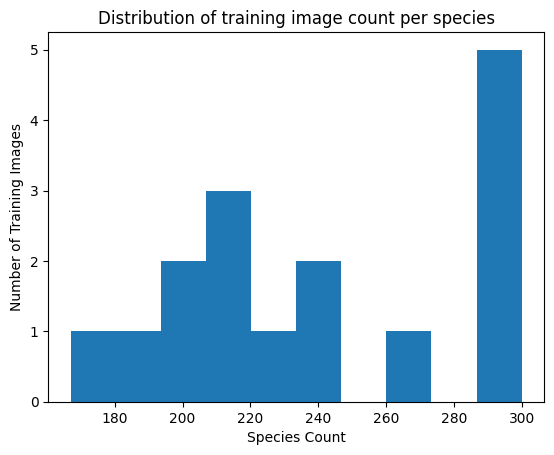

In [11]:
train.annotations["category_id"].value_counts().plot(kind="hist", title="Distribution of training image count per species", xlabel="Species Count", ylabel="Number of Training Images")

In [12]:
train.annotations["class"].value_counts()

class
Elasmobranchii    3850
Name: count, dtype: int64